In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
e = st.norm()

In [3]:
def G(mu, delta):
    return e.cdf(mu) - e.cdf(mu + delta)

def g(mu, delta):
    return e.pdf(mu) - e.pdf(mu+delta)

def func1(mu1, mu2, delta):
    return G(mu1, delta)*G(mu2, delta)*(1 + (mu1 + mu2)/delta) + (G(mu1, delta)*g(mu2, delta) + G(mu2, delta)*g(mu1, delta))/delta

In [10]:
a,b,c = 20,20,20
mu1s = np.linspace(0.01, 20, a)
mu2s = np.linspace(0.01, 20, b)
deltas = np.linspace(-20, -0.01, c)

mu1gri, mu2gri, delgri = np.meshgrid(mu1s, mu2s, deltas)

In [11]:
result = func1(mu1gri, mu2gri, delgri)

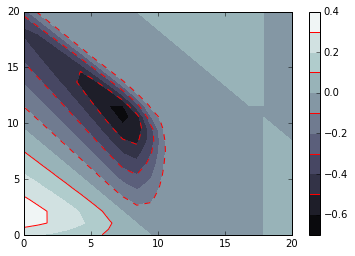

In [37]:
eps = 0.01
cs = plt.contourf(mu1s, mu2s,result[10], 10, cmap = plt.cm.bone)
cs2 = plt.contour(cs, levels = cs.levels[::2], colors = 'r')
cbar = plt.colorbar(cs)
cbar.add_lines(cs2)
plt.show()

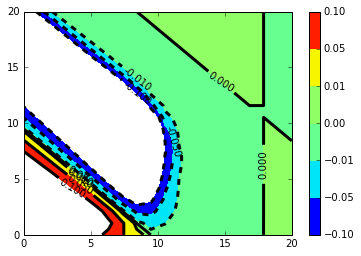

In [51]:
# これが見やすい
levels = [ -0.1,-0.05, -0.01, 0, 0.01, 0.05, 0.1]
cs3 = plt.contourf(mu1s, mu2s,result[10], levels, cmap = plt.cm.jet)

cs4 = plt.contour(mu1s, mu2s,result[10], levels, colors = ('k', ), linewidths = (3, ))
plt.clabel(cs4)
plt.colorbar(cs3)

plt.show()